<a href="https://colab.research.google.com/github/jessicasalazar/vision_computador/blob/main/cv_taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Instalación de paquetes

#!pip install gdown

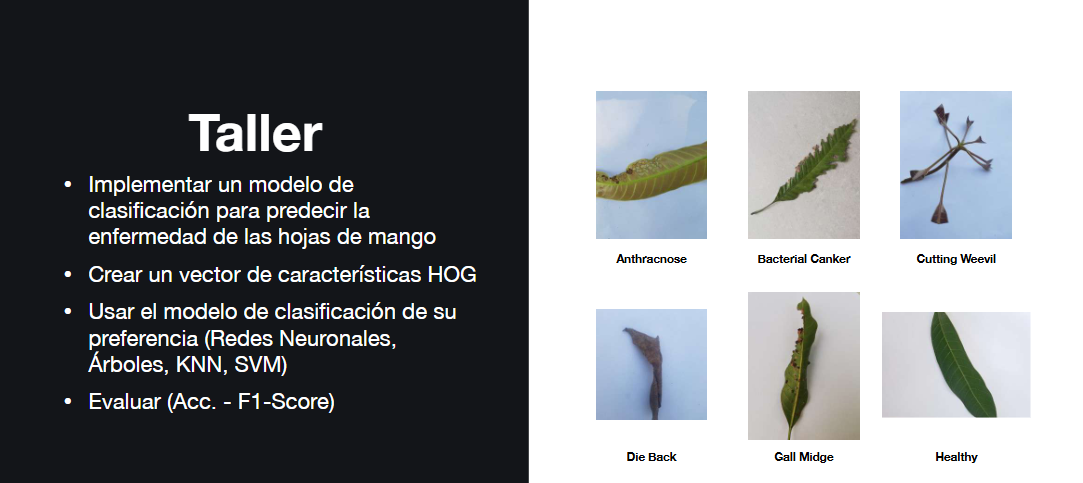

[LINK DATASET](https://drive.usercontent.google.com/download?id=1KXWbGMu3Kiv9ghg-BWRA3z3Uvb0q4gXr&export=download&authuser=0)

## id=1KXWbGMu3Kiv9ghg-BWRA3z3Uvb0q4gXr


In [3]:
# Importing libraries

import os
import numpy as np
import random
from PIL import Image
import glob
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd


# Download the link of the dataset

Descargar archivo con el siguiente comando



```
# !gdown id -O nombre_archivo_salida.zip
```




In [4]:
#Directory save the files of the dataset

%mkdir dataset_work

In [5]:
!gdown 1KXWbGMu3Kiv9ghg-BWRA3z3Uvb0q4gXr -O mango_leaf.zip

Downloading...
From (original): https://drive.google.com/uc?id=1KXWbGMu3Kiv9ghg-BWRA3z3Uvb0q4gXr
From (redirected): https://drive.google.com/uc?id=1KXWbGMu3Kiv9ghg-BWRA3z3Uvb0q4gXr&confirm=t&uuid=82df8f85-8e7b-41c4-a1a1-8d8002a6fc4b
To: /content/mango_leaf.zip
100% 110M/110M [00:01<00:00, 67.2MB/s]


## Unzip the dataset file located into the directory dataset_work

In [6]:
!unzip -q mango_leaf.zip -d /content/dataset_work


In [7]:
name_dir_dataset = "mango_leaf_disease"
name_dir_dataset
class_names = os.listdir(os.path.join("dataset_work",name_dir_dataset))
class_names = [f for f in class_names if f != "readme.txt"]

for i in class_names:
  print(f"{i} leaf disease")

Gall Midge leaf disease
Powdery Mildew leaf disease
Die Back leaf disease
Healthy leaf disease
Sooty Mould leaf disease
Anthracnose leaf disease
Bacterial Canker leaf disease
Cutting Weevil leaf disease


In [8]:
def random_sample():
  #choose_one =
  return np.random.choice(class_names)

In [9]:
def sample_image(choose_one):
  l = os.path.join("/content/dataset_work/mango_leaf_disease",choose_one)
  image_names = glob.glob(l+"/*.jpg")
  return random.sample(image_names, 4)


(240, 320, 3)
(240, 240, 3)
(320, 240, 3)
(240, 320, 3)


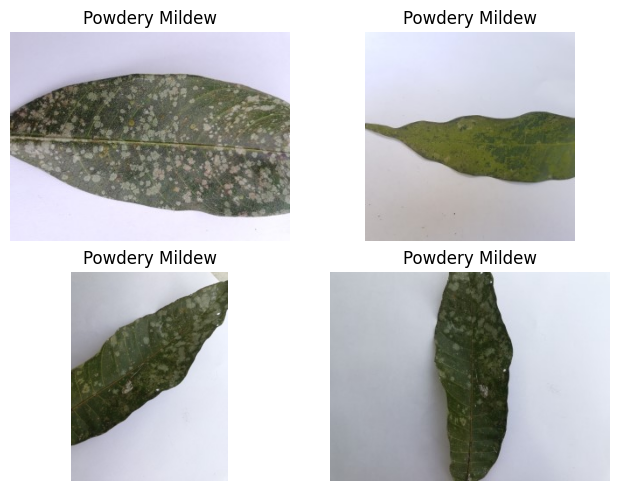

In [10]:
#plot images
choose_one = random_sample()
four_image_names = sample_image(choose_one)

fig, axs = plt.subplots(2,2, layout='constrained')
for ax, file_name in zip(axs.flat, four_image_names):
  ax.set_title(choose_one)
  ax.set_axis_off()
  img = cv.imread(file_name)
  print(img.shape)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  ax.imshow(img)

plt.show()


(64, 64)
(64, 64)
(64, 64)
(64, 64)


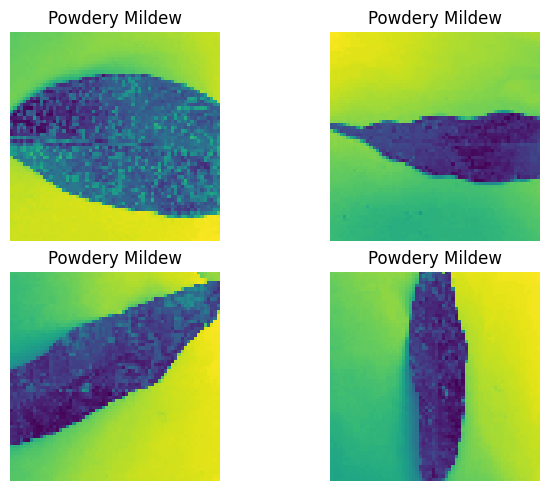

In [11]:
fig, axs = plt.subplots(2,2, layout='constrained')
for ax, file_name in zip(axs.flat, four_image_names):
  ax.set_title(choose_one)
  ax.set_axis_off()
  img = cv.imread(file_name)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  size_img = (64,64)
  img_gray = cv.resize(img_gray, size_img)
  print(img_gray.shape)

  ax.imshow(img_gray)

plt.show()


[HOG Feature Descriptor](https://medium.com/@dnemutlu/hog-feature-descriptor-263313c3b40d)

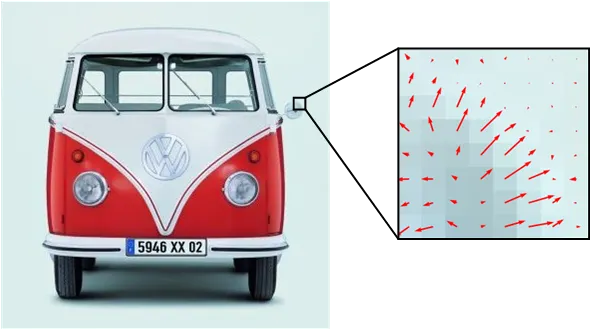

 OpenCV’s HOGDescriptor class to create the HOG descriptor. The parameters of the HOG descriptor are setup using the HOGDescriptor() function. The parameters of the HOGDescriptor() function and their default values are given below:

```
cv2.HOGDescriptor(win_size=(64, 128),
                  block_size=(16, 16),
                  block_stride=(8, 8),
                  cell_size=(8, 8),
                  nbins=9,
                  win_sigma=DEFAULT_WIN_SIGMA,
                  threshold_L2hys=0.2,
                  gamma_correction=true,
                  nlevels=DEFAULT_NLEVELS)
```



In [12]:
img = cv.imread("/content/dataset_work/mango_leaf_disease/Cutting Weevil/20211011_131101 (Custom) (Custom).jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
size_img = (64,64)
img_gray = cv.resize(img_gray, size_img)
win_size = img_gray.shape
block_size=(16, 16)
block_stride=(8, 8)
cell_size=(8, 8)
nbins=9

In [13]:
hog = cv.HOGDescriptor(win_size,
                  block_size,
                  block_stride,
                  cell_size,
                  nbins)

In [14]:
hog_descriptor = hog.compute(img_gray)

print ('HOG Descriptor:', hog_descriptor)
print ('HOG Descriptor has shape:', hog_descriptor.shape)

HOG Descriptor: [0.08767453 0.13891056 0.30223244 ... 0.29225776 0.21572123 0.1199685 ]
HOG Descriptor has shape: (1764,)


# HOG descriptir method

In [15]:
def feature_extraction(path):
  img = cv.imread(path)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  size_img = (64,64)
  img_gray = cv.resize(img_gray, size_img)
  win_size = img_gray.shape
  block_size=(16, 16)
  block_stride=(8, 8)
  cell_size=(8, 8)
  nbins=9
  hog = cv.HOGDescriptor(win_size,
                  block_size,
                  block_stride,
                  cell_size,
                  nbins)
  return hog.compute(img_gray)

## To create a dataframe with the features of the image

In [16]:
image_path_array = []
hog_descriptor_array = []
y_array = []

for i in class_names:
  print(i)
  l = os.path.join("/content/dataset_work/mango_leaf_disease",i)
  image_names = glob.glob(l+"/*.jpg")
  #print(image_names)

  for j in image_names:
    #print(j,i)
    image_path_array.append(j)
    y_array.append(i)
    hog_descriptor_array.append(feature_extraction(j))

Gall Midge
Powdery Mildew
Die Back
Healthy
Sooty Mould
Anthracnose
Bacterial Canker
Cutting Weevil


In [17]:
len(image_path_array), len(y_array), len(hog_descriptor_array)

(4000, 4000, 4000)

In [18]:
image_path_array[2]

'/content/dataset_work/mango_leaf_disease/Gall Midge/IMG_20211106_161418 (Custom).jpg'

In [19]:
#crear una lista de feature names
num_of_descriptors = len(hog_descriptor_array[0])
descriptor_pos = [f"f{i+1}" for i in range(num_of_descriptors)]

df_hog = pd.DataFrame(hog_descriptor_array, columns=descriptor_pos)
df_hog

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f1755,f1756,f1757,f1758,f1759,f1760,f1761,f1762,f1763,f1764
0,0.153102,0.262217,0.275197,0.090162,0.040162,0.000000,0.005066,0.003681,0.040169,0.273520,...,0.116897,0.153780,0.137126,0.120676,0.155579,0.229972,0.213113,0.229972,0.216810,0.123599
1,0.150399,0.192126,0.250660,0.080887,0.247660,0.046322,0.106705,0.035508,0.095630,0.187566,...,0.143385,0.080337,0.082892,0.148992,0.375784,0.375784,0.189455,0.136312,0.139862,0.142893
2,0.100195,0.121580,0.258710,0.078352,0.211156,0.007823,0.045420,0.033876,0.094107,0.169544,...,0.102314,0.123549,0.064661,0.111720,0.171835,0.248330,0.191916,0.180723,0.179907,0.150607
3,0.133083,0.108527,0.255766,0.092786,0.289176,0.007180,0.007942,0.001481,0.125165,0.151333,...,0.184187,0.234163,0.261110,0.261110,0.174756,0.157580,0.048346,0.076859,0.057061,0.148841
4,0.037480,0.044375,0.134221,0.002936,0.295966,0.000000,0.090887,0.030373,0.037480,0.055353,...,0.005942,0.084249,0.330186,0.330186,0.330186,0.133718,0.008634,0.002989,0.000000,0.028423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.088551,0.097392,0.257755,0.143206,0.308624,0.090619,0.065226,0.010157,0.081523,0.072548,...,0.016906,0.040891,0.029849,0.083520,0.175345,0.351001,0.289934,0.192934,0.114157,0.041709
3996,0.027628,0.012394,0.025955,0.001902,0.067684,0.001660,0.025179,0.016198,0.027565,0.255113,...,0.003880,0.004116,0.001716,0.012741,0.147530,0.307354,0.307354,0.233743,0.063927,0.005782
3997,0.075159,0.088233,0.117185,0.019534,0.113609,0.022162,0.083624,0.042847,0.069308,0.154145,...,0.009857,0.022000,0.006246,0.047417,0.116610,0.315967,0.315967,0.185913,0.056083,0.027805
3998,0.061651,0.056965,0.155802,0.040110,0.300814,0.116731,0.155636,0.108280,0.074885,0.043452,...,0.009657,0.009086,0.014059,0.080586,0.180042,0.323780,0.323780,0.223325,0.070099,0.011742


In [20]:

df_hog.insert(0, "path_images", image_path_array)

In [21]:
df_hog

,path_images,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1755,f1756,f1757,f1758,f1759,f1760,f1761,f1762,f1763,f1764
0,/content/dataset_work/mango_leaf_disease/Gall ...,0.153102,0.262217,0.275197,0.090162,0.040162,0.000000,0.005066,0.003681,0.040169,...,0.116897,0.153780,0.137126,0.120676,0.155579,0.229972,0.213113,0.229972,0.216810,0.123599
1,/content/dataset_work/mango_leaf_disease/Gall ...,0.150399,0.192126,0.250660,0.080887,0.247660,0.046322,0.106705,0.035508,0.095630,...,0.143385,0.080337,0.082892,0.148992,0.375784,0.375784,0.189455,0.136312,0.139862,0.142893
2,/content/dataset_work/mango_leaf_disease/Gall ...,0.100195,0.121580,0.258710,0.078352,0.211156,0.007823,0.045420,0.033876,0.094107,...,0.102314,0.123549,0.064661,0.111720,0.171835,0.248330,0.191916,0.180723,0.179907,0.150607
3,/content/dataset_work/mango_leaf_disease/Gall ...,0.133083,0.108527,0.255766,0.092786,0.289176,0.007180,0.007942,0.001481,0.125165,...,0.184187,0.234163,0.261110,0.261110,0.174756,0.157580,0.048346,0.076859,0.057061,0.148841
4,/content/dataset_work/mango_leaf_disease/Gall ...,0.037480,0.044375,0.134221,0.002936,0.295966,0.000000,0.090887,0.030373,0.037480,...,0.005942,0.084249,0.330186,0.330186,0.330186,0.133718,0.008634,0.002989,0.000000,0.028423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,/content/dataset_work/mango_leaf_disease/Cutti...,0.088551,0.097392,0.257755,0.143206,0.308624,0.090619,0.065226,0.010157,0.081523,...,0.016906,0.040891,0.029849,0.083520,0.175345,0.351001,0.289934,0.192934,0.114157,0.041709
3996,/content/dataset_work/mango_leaf_disease/Cutti...,0.027628,0.012394,0.025955,0.001902,0.067684,0.001660,0.025179,0.016198,0.027565,...,0.003880,0.004116,0.001716,0.012741,0.147530,0.307354,0.307354,0.233743,0.063927,0.005782
3997,/content/dataset_work/mango_leaf_disease/Cutti...,0.075159,0.088233,0.117185,0.019534,0.113609,0.022162,0.083624,0.042847,0.069308,...,0.009857,0.022000,0.006246,0.047417,0.116610,0.315967,0.315967,0.185913,0.056083,0.027805
3998,/content/dataset_work/mango_leaf_disease/Cutti...,0.061651,0.056965,0.155802,0.040110,0.300814,0.116731,0.155636,0.108280,0.074885,...,0.009657,0.009086,0.014059,0.080586,0.180042,0.323780,0.323780,0.223325,0.070099,0.011742


In [22]:
df_hog["y"] = y_array

In [23]:
df_hog

,path_images,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1756,f1757,f1758,f1759,f1760,f1761,f1762,f1763,f1764,y
0,/content/dataset_work/mango_leaf_disease/Gall ...,0.153102,0.262217,0.275197,0.090162,0.040162,0.000000,0.005066,0.003681,0.040169,...,0.153780,0.137126,0.120676,0.155579,0.229972,0.213113,0.229972,0.216810,0.123599,Gall Midge
1,/content/dataset_work/mango_leaf_disease/Gall ...,0.150399,0.192126,0.250660,0.080887,0.247660,0.046322,0.106705,0.035508,0.095630,...,0.080337,0.082892,0.148992,0.375784,0.375784,0.189455,0.136312,0.139862,0.142893,Gall Midge
2,/content/dataset_work/mango_leaf_disease/Gall ...,0.100195,0.121580,0.258710,0.078352,0.211156,0.007823,0.045420,0.033876,0.094107,...,0.123549,0.064661,0.111720,0.171835,0.248330,0.191916,0.180723,0.179907,0.150607,Gall Midge
3,/content/dataset_work/mango_leaf_disease/Gall ...,0.133083,0.108527,0.255766,0.092786,0.289176,0.007180,0.007942,0.001481,0.125165,...,0.234163,0.261110,0.261110,0.174756,0.157580,0.048346,0.076859,0.057061,0.148841,Gall Midge
4,/content/dataset_work/mango_leaf_disease/Gall ...,0.037480,0.044375,0.134221,0.002936,0.295966,0.000000,0.090887,0.030373,0.037480,...,0.084249,0.330186,0.330186,0.330186,0.133718,0.008634,0.002989,0.000000,0.028423,Gall Midge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,/content/dataset_work/mango_leaf_disease/Cutti...,0.088551,0.097392,0.257755,0.143206,0.308624,0.090619,0.065226,0.010157,0.081523,...,0.040891,0.029849,0.083520,0.175345,0.351001,0.289934,0.192934,0.114157,0.041709,Cutting Weevil
3996,/content/dataset_work/mango_leaf_disease/Cutti...,0.027628,0.012394,0.025955,0.001902,0.067684,0.001660,0.025179,0.016198,0.027565,...,0.004116,0.001716,0.012741,0.147530,0.307354,0.307354,0.233743,0.063927,0.005782,Cutting Weevil
3997,/content/dataset_work/mango_leaf_disease/Cutti...,0.075159,0.088233,0.117185,0.019534,0.113609,0.022162,0.083624,0.042847,0.069308,...,0.022000,0.006246,0.047417,0.116610,0.315967,0.315967,0.185913,0.056083,0.027805,Cutting Weevil
3998,/content/dataset_work/mango_leaf_disease/Cutti...,0.061651,0.056965,0.155802,0.040110,0.300814,0.116731,0.155636,0.108280,0.074885,...,0.009086,0.014059,0.080586,0.180042,0.323780,0.323780,0.223325,0.070099,0.011742,Cutting Weevil


In [24]:
df_hog.to_csv("taller_1.csv")

## SVM

In [25]:
X = df_hog.drop(["path_images", "y"], axis=1)
y =df_hog["y"]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import svm


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [28]:
#clf = svm.SVC()
#clf.fit(X_train,y_train)
X_train.shape

(2680, 1764)

In [29]:
X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f1755,f1756,f1757,f1758,f1759,f1760,f1761,f1762,f1763,f1764
2653,0.003249,0.015530,0.027304,0.063945,0.339479,0.339479,0.225186,0.010753,0.021979,0.013837,...,0.059236,0.079205,0.060274,0.036270,0.015797,0.085041,0.089950,0.220358,0.267702,0.125900
1640,0.112866,0.238503,0.253134,0.253134,0.253134,0.099496,0.029731,0.021006,0.041625,0.055453,...,0.089339,0.147732,0.182754,0.211655,0.061644,0.256725,0.096526,0.259550,0.064785,0.117903
1802,0.122888,0.062069,0.011828,0.003552,0.089794,0.101786,0.259398,0.259398,0.259398,0.199178,...,0.253379,0.253379,0.133851,0.122789,0.000857,0.148237,0.043703,0.191470,0.253379,0.253379
1601,0.002721,0.001418,0.001749,0.021471,0.279110,0.281984,0.281984,0.083048,0.005192,0.065338,...,0.208105,0.262993,0.181850,0.262993,0.169367,0.262993,0.114840,0.058899,0.036959,0.262993
1299,0.081408,0.031027,0.100155,0.014955,0.342322,0.094705,0.147026,0.046944,0.084160,0.081813,...,0.015885,0.277910,0.277910,0.251666,0.257505,0.277910,0.062004,0.037916,0.010721,0.107503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0.055641,0.012228,0.036590,0.000000,0.247294,0.207033,0.251517,0.165901,0.085727,0.098959,...,0.088979,0.058435,0.011840,0.016498,0.024979,0.171434,0.278348,0.278348,0.278348,0.105333
2118,0.104118,0.165052,0.233984,0.166183,0.165258,0.105026,0.046706,0.083897,0.080632,0.092522,...,0.188108,0.208404,0.190731,0.208404,0.208404,0.208404,0.075373,0.163055,0.208404,0.130848
78,0.166601,0.107146,0.134107,0.009385,0.251680,0.000000,0.008214,0.002745,0.153368,0.226992,...,0.067544,0.138637,0.110309,0.166297,0.109373,0.291072,0.291072,0.185018,0.076948,0.073324
2961,0.080802,0.016218,0.015849,0.005236,0.062463,0.003770,0.082002,0.075505,0.090751,0.034118,...,0.258067,0.086239,0.128072,0.064163,0.098393,0.163309,0.074611,0.113485,0.113361,0.151650


In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [31]:
num_tranforme = StandardScaler()
cat_transform = OneHotEncoder()


In [32]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])


param_grid = {
    "svm__C": [0.1, 1, 10],
    "svm__gamma": [0.01, 0.001, "scale"],
    "svm__kernel": ["linear", "rbf"]
}


grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': [0.01, 0.001, 'scale'],
                         'svm__kernel': ['linear', 'rbf']},
             verbose=2)

In [33]:
test_score = grid_search.score(X_test, y_test)
print("Test accuracy:", test_score)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Test accuracy: 0.8356060606060606
Best parameters: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best CV score: 0.8283582089552238


In [34]:
y_pred = grid_search.best_estimator_.predict(X_test)



In [35]:
cf = confusion_matrix(y_test, y_pred)

In [36]:
print("Matriz de Confusión:")
print(cf)

Matriz de Confusión:
[[127   1   4   5  10   9   7   2]
 [  0 156   0   0   0   0   0   9]
 [  2   0 161   2   0   0   0   0]
 [  6   0   0 150   8   1   0   0]
 [ 15   3   0   1 134   3   7   2]
 [ 15   0   0   2   8 132   6   2]
 [  8   0   0   0   6   2 133  16]
 [  3  19   0   1   7  13  12 110]]


In [37]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
                  precision    recall  f1-score   support

     Anthracnose       0.72      0.77      0.74       165
Bacterial Canker       0.87      0.95      0.91       165
  Cutting Weevil       0.98      0.98      0.98       165
        Die Back       0.93      0.91      0.92       165
      Gall Midge       0.77      0.81      0.79       165
         Healthy       0.82      0.80      0.81       165
  Powdery Mildew       0.81      0.81      0.81       165
     Sooty Mould       0.78      0.67      0.72       165

        accuracy                           0.84      1320
       macro avg       0.84      0.84      0.83      1320
    weighted avg       0.84      0.84      0.83      1320



## Preparar Pipeline Decision Tree Classifier

In [38]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", DecisionTreeClassifier(random_state = 42))
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [5, 10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}


scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'roc_auc_ovr': 'roc_auc_ovr'
}

grid_search_dt = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit='roc_auc_ovr',
    cv=5,
    verbose=2,
    n_jobs=-1
)


In [39]:
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 10, 20, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             refit='roc_auc_ovr',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'roc_auc_ovr': 'roc_auc_ovr'},
             verbose=2)

In [40]:
test_score = grid_search_dt.score(X_test, y_test)
print("Test accuracy:", test_score)

print("Best parameters:", grid_search_dt.best_params_)
print("Best CV score:", grid_search_dt.best_score_)

Test accuracy: 0.7852469500196773
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best CV score: 0.7760394456289978


In [41]:
y_pred = grid_search_dt.best_estimator_.predict(X_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))



# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)


Reporte de Clasificación:
                  precision    recall  f1-score   support

     Anthracnose       0.27      0.18      0.22       165
Bacterial Canker       0.57      0.70      0.63       165
  Cutting Weevil       0.71      0.59      0.64       165
        Die Back       0.59      0.62      0.60       165
      Gall Midge       0.31      0.41      0.35       165
         Healthy       0.26      0.30      0.28       165
  Powdery Mildew       0.35      0.45      0.40       165
     Sooty Mould       0.39      0.16      0.23       165

        accuracy                           0.43      1320
       macro avg       0.43      0.43      0.42      1320
    weighted avg       0.43      0.43      0.42      1320

Matriz de Confusión:
[[ 30   9   9  16  32  40  18  11]
 [  2 116   1   0  10   3  29   4]
 [  2   0  97  24  22  19   1   0]
 [ 12   5   4 103  26  10   4   1]
 [ 21  12   5   7  67  23  19  11]
 [ 24   4  15  18  28  50  22   4]
 [ 13   7   3   6  21  28  75  12]
 [  6  49

In [42]:
rf_base = RandomForestClassifier(random_state = 42)
#gb_base = GradientBoostingClassifier(random_state = 42)

In [43]:
param_grid_rf = {
    'classifier__n_estimators': [100, 300],
    'classifier__max_depth': list(range(2, 8)),
    'classifier__min_samples_leaf': [1, 10, 50]
}

param_grid_gb = {
    'classifier__n_estimators': [100, 300],
    'classifier__max_depth': list(range(2, 8)),
    'classifier__min_samples_leaf': [1, 10, 50]
}

pipeline_rf = Pipeline(steps = [
        ('classifier', rf_base)
])

pipeline_gb = Pipeline(steps = [
        ('classifier', gb_base)
])

In [44]:
rf = GridSearchCV(pipeline_rf, cv = 3, param_grid = param_grid_rf, scoring=scoring, refit='roc_auc_ovr')
#gb = GridSearchCV(pipeline_gb, cv = 3, param_grid = param_grid_gb, scoring=scoring, refit='roc_auc_ovr')

In [45]:
rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [1, 10, 50],
                         'classifier__n_estimators': [100, 300]},
             refit='roc_auc_ovr',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'roc_auc_ovr': 'roc_auc_ovr'})

In [50]:
print(f"Mejores parámetros: {rf.best_params_}")
print(f"Mejor puntuación ROC-AUC: {rf.best_score_}")

# Predicciones
y_pred = rf.best_estimator_.predict(X_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))



# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Mejores parámetros: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 300}
Mejor puntuación ROC-AUC: 0.9413835965195848
Reporte de Clasificación:
                  precision    recall  f1-score   support

     Anthracnose       0.71      0.61      0.66       165
Bacterial Canker       0.69      0.95      0.80       165
  Cutting Weevil       0.90      0.95      0.92       165
        Die Back       0.91      0.90      0.91       165
      Gall Midge       0.66      0.65      0.65       165
         Healthy       0.68      0.71      0.69       165
  Powdery Mildew       0.64      0.76      0.70       165
     Sooty Mould       0.54      0.27      0.36       165

        accuracy                           0.72      1320
       macro avg       0.71      0.72      0.71      1320
    weighted avg       0.71      0.72      0.71      1320

Matriz de Confusión:
[[101   1   8   5  19  17   7   7]
 [  0 156   0   0   0   0   0   9]
 [  1   0 156   1   0 

Se implementan 3 modelos de clasificación para predecir enfermedades en la hoja de mango extrayendo las caracteríticas a través de los descriptores HOG (histogram of oriented gradients). Para la creación de este extractor, se realizón el siguiente preprocesamiento: Se redimensionaron las imagenes con una realcion 1:1, se convierte a escala grises y por último se extraen las caracteríticas de la imagen usando la herramienta de OpenCV HOGDescriptor. Se usó Support Vector Machine, y se implementaron métodos de ensamble con el objetivo de encotrar lo mejores párametros de los clasificadores RandomForestClassifier y DecisionTreeClassifier. Los modelos fueron evaluados a partir de las métricas F1-score y accuracy donde se evidencian los siguientes resultados:

**SVM**: Es clasificador presento un accuracy de 0.84, presentando mejor resultado que los demás modelos evaluados, presentando mejores métricas en cada una de sus clases precision, recall y f1-score.

***RandomForestClassifier***: este clasificador fue el que peor desempeño tuvo, su accuracy fue de 0.78. Sin embargo, el reporte mostrado por matriz de confusión las métricas de desempeño en precision, regall y f1-score se encuentra por debajo de 0.5.

***DecisionTreeClassifier***: Por último, DecisionTreeClassifier presenta unas métricas de desempeño mas ajustadas. Las métricas precision, recall y f1-score tienen valor promedio de 0.7.

In [60]:

!git config --global user.email "joanfco1@gmail.com"
!git config --global user.name "joanfco30"

In [64]:
!git remote set-url origin https://github.com/jessicasalazar/vision_computador.git
!git branch -M main
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/jessicasalazar/vision_computador.git'


In [65]:
# (1) Verifica que estás en el repo
%cd /content/vision_computador

# (2) Crea un archivo de prueba (si aún no tienes nada)
!echo "# Vision Computador" > README.md

# (3) Agrega los archivos al área de preparación
!git add .

# (4) Haz tu primer commit
!git commit -m "Initial commit from Colab"

# (5) Renombra la rama actual a main
!git branch -M main

# (6) Empuja al repositorio remoto en GitHub
!git push -u origin main


/content/vision_computador
[main (root-commit) 6975a76] Initial commit from Colab
 1 file changed, 1 insertion(+)
 create mode 100644 README.md
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git remote set-url origin https://<TOKEN>@github.com/jessicasalazar/vision_computador.git
